# Week 9, Day 2: Activation & Loss Functions

## 🎯 Today's Objectives
- Deep dive into activation functions
- Understanding loss functions for different tasks
- Implement custom loss functions
- Financial applications: Return prediction loss

---

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
torch.manual_seed(42)

print("✅ Libraries loaded!")
print(f"📚 Day 2: Activation & Loss Functions")

✅ Libraries loaded!
📚 Day 2: Activation & Loss Functions


---

## Part 1: Activation Functions Deep Dive

### Why Activation Functions?

Without non-linear activations, stacking layers is useless:
$$\text{Linear}(\text{Linear}(x)) = \text{Still Linear}$$

Activations introduce **non-linearity** to learn complex patterns.

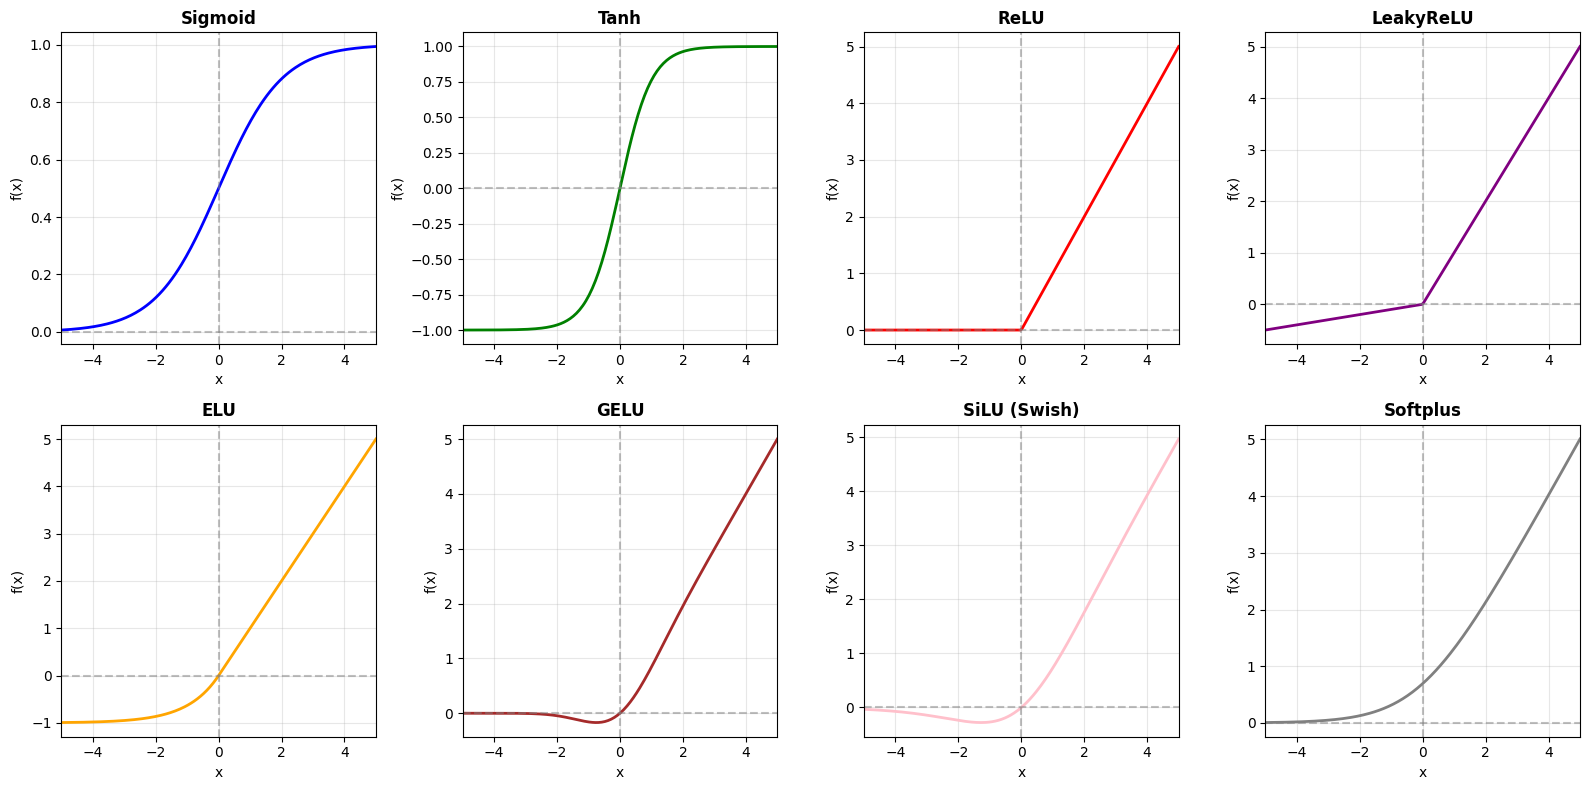


📊 ACTIVATION FUNCTION PROPERTIES:
Function     Range        Pros                      Cons                
----------------------------------------------------------------------
Sigmoid      (0, 1)       Binary output             Vanishing gradient  
Tanh         (-1, 1)      Zero-centered             Vanishing gradient  
ReLU         [0, ∞)       Fast, sparse              Dead neurons        
LeakyReLU    (-∞, ∞)      No dead neurons           Slightly slower     
ELU          (-1, ∞)      Smooth, negative values   Exponential calc    
GELU         (-∞, ∞)      Used in Transformers      Complex             
SiLU/Swish   (-∞, ∞)      Self-gated                Good for deep nets  
Softplus     (0, ∞)       Smooth ReLU               Never zero          


In [8]:
# All activation functions
x = torch.linspace(-5, 5, 200)

# Calculate activations
activations = {
    'Sigmoid': torch.sigmoid(x),
    'Tanh': torch.tanh(x),
    'ReLU': F.relu(x),
    'LeakyReLU': F.leaky_relu(x, 0.1),
    'ELU': F.elu(x),
    'GELU': F.gelu(x),
    'SiLU (Swish)': F.silu(x),
    'Softplus': F.softplus(x)
}

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']

for i, (name, y) in enumerate(activations.items()):
    axes[i].plot(x.numpy(), y.numpy(), color=colors[i], linewidth=2)
    axes[i].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    axes[i].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    axes[i].set_title(name, fontweight='bold', fontsize=12)
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('f(x)')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim(-5, 5)

plt.tight_layout()
plt.show()

print("\n📊 ACTIVATION FUNCTION PROPERTIES:")
print("="*70)
properties = [
    ["Sigmoid", "(0, 1)", "Binary output", "Vanishing gradient"],
    ["Tanh", "(-1, 1)", "Zero-centered", "Vanishing gradient"],
    ["ReLU", "[0, ∞)", "Fast, sparse", "Dead neurons"],
    ["LeakyReLU", "(-∞, ∞)", "No dead neurons", "Slightly slower"],
    ["ELU", "(-1, ∞)", "Smooth, negative values", "Exponential calc"],
    ["GELU", "(-∞, ∞)", "Used in Transformers", "Complex"],
    ["SiLU/Swish", "(-∞, ∞)", "Self-gated", "Good for deep nets"],
    ["Softplus", "(0, ∞)", "Smooth ReLU", "Never zero"],
]

print(f"{'Function':<12} {'Range':<12} {'Pros':<25} {'Cons':<20}")
print("-"*70)
for row in properties:
    print(f"{row[0]:<12} {row[1]:<12} {row[2]:<25} {row[3]:<20}")

### 📊 OUTPUT EXPLANATION:

**Most Common Choices:**
- **Hidden layers**: ReLU (default), GELU (transformers)
- **Output (regression)**: None (linear)
- **Output (binary)**: Sigmoid
- **Output (multi-class)**: Softmax

---

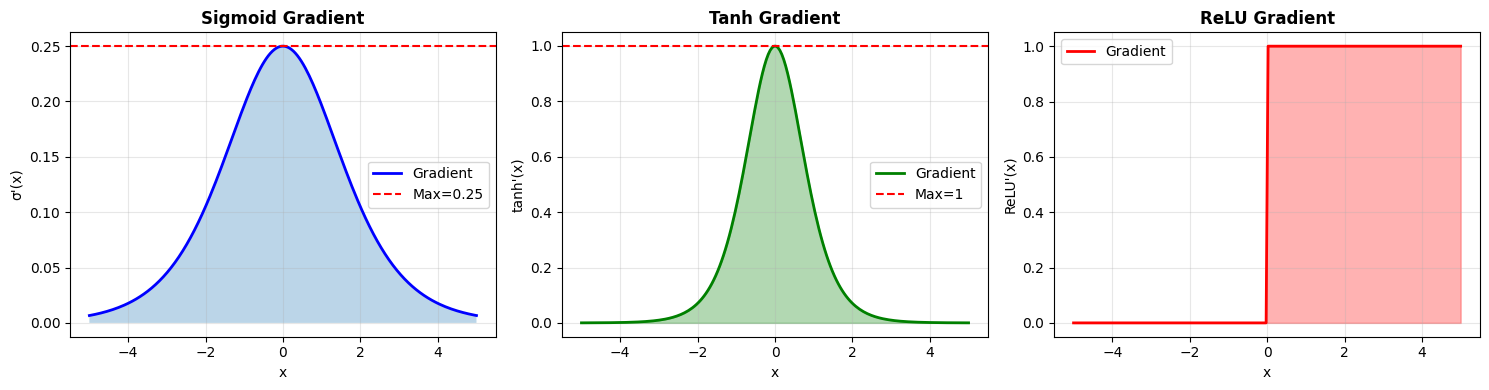


📊 VANISHING GRADIENT PROBLEM:
• Sigmoid/Tanh gradients → 0 for large |x|
• In deep networks: 0.25 × 0.25 × ... → vanishingly small
• ReLU gradient is 0 or 1 → gradients don't vanish!

⚠️  ReLU problem: 'Dead neurons' when x < 0 (gradient = 0)


In [9]:
# Vanishing Gradient Problem Visualization
x = torch.linspace(-5, 5, 200, requires_grad=False)

# Calculate gradients manually
def sigmoid_grad(x):
    s = torch.sigmoid(x)
    return s * (1 - s)

def tanh_grad(x):
    return 1 - torch.tanh(x)**2

def relu_grad(x):
    return (x > 0).float()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Sigmoid gradient
axes[0].plot(x, sigmoid_grad(x), 'b-', linewidth=2, label='Gradient')
axes[0].fill_between(x.numpy(), 0, sigmoid_grad(x).numpy(), alpha=0.3)
axes[0].axhline(y=0.25, color='r', linestyle='--', label='Max=0.25')
axes[0].set_title('Sigmoid Gradient', fontweight='bold')
axes[0].set_xlabel('x')
axes[0].set_ylabel("σ'(x)")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Tanh gradient
axes[1].plot(x, tanh_grad(x), 'g-', linewidth=2, label='Gradient')
axes[1].fill_between(x.numpy(), 0, tanh_grad(x).numpy(), alpha=0.3, color='green')
axes[1].axhline(y=1, color='r', linestyle='--', label='Max=1')
axes[1].set_title('Tanh Gradient', fontweight='bold')
axes[1].set_xlabel('x')
axes[1].set_ylabel("tanh'(x)")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# ReLU gradient
axes[2].plot(x, relu_grad(x), 'r-', linewidth=2, label='Gradient')
axes[2].fill_between(x.numpy(), 0, relu_grad(x).numpy(), alpha=0.3, color='red')
axes[2].set_title('ReLU Gradient', fontweight='bold')
axes[2].set_xlabel('x')
axes[2].set_ylabel("ReLU'(x)")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 VANISHING GRADIENT PROBLEM:")
print("="*60)
print("• Sigmoid/Tanh gradients → 0 for large |x|")
print("• In deep networks: 0.25 × 0.25 × ... → vanishingly small")
print("• ReLU gradient is 0 or 1 → gradients don't vanish!")
print("\n⚠️  ReLU problem: 'Dead neurons' when x < 0 (gradient = 0)")

---

## Part 2: Loss Functions

### Loss Function = How We Measure Error

| Task | Loss Function | Formula | PyTorch |
|------|--------------|---------|--------|
| Regression | MSE | $\frac{1}{n}\sum(y - \hat{y})^2$ | `nn.MSELoss()` |
| Regression | MAE | $\frac{1}{n}\sum|y - \hat{y}|$ | `nn.L1Loss()` |
| Binary | BCE | $-[y\log(\hat{y}) + (1-y)\log(1-\hat{y})]$ | `nn.BCELoss()` |
| Multi-class | CE | $-\sum_c y_c \log(\hat{y}_c)$ | `nn.CrossEntropyLoss()` |

In [10]:
# Regression Losses
print("REGRESSION LOSSES")
print("="*60)

# Sample predictions vs actuals
y_true = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
y_pred = torch.tensor([1.2, 1.8, 3.5, 3.8, 5.2])

# MSE Loss
mse_loss = nn.MSELoss()
mse = mse_loss(y_pred, y_true)

# MAE Loss
mae_loss = nn.L1Loss()
mae = mae_loss(y_pred, y_true)

# Huber Loss (smooth L1) - less sensitive to outliers
huber_loss = nn.SmoothL1Loss()
huber = huber_loss(y_pred, y_true)

print(f"True values:  {y_true.tolist()}")
print(f"Predictions:  {y_pred.tolist()}")
print(f"Errors:       {(y_pred - y_true).tolist()}")
print()
print(f"MSE Loss:   {mse.item():.4f}  (Mean Squared Error)")
print(f"MAE Loss:   {mae.item():.4f}  (Mean Absolute Error)")
print(f"Huber Loss: {huber.item():.4f}  (Smooth L1, robust to outliers)")

REGRESSION LOSSES
True values:  [1.0, 2.0, 3.0, 4.0, 5.0]
Predictions:  [1.2000000476837158, 1.7999999523162842, 3.5, 3.799999952316284, 5.199999809265137]
Errors:       [0.20000004768371582, -0.20000004768371582, 0.5, -0.20000004768371582, 0.19999980926513672]

MSE Loss:   0.0820  (Mean Squared Error)
MAE Loss:   0.2600  (Mean Absolute Error)
Huber Loss: 0.0410  (Smooth L1, robust to outliers)


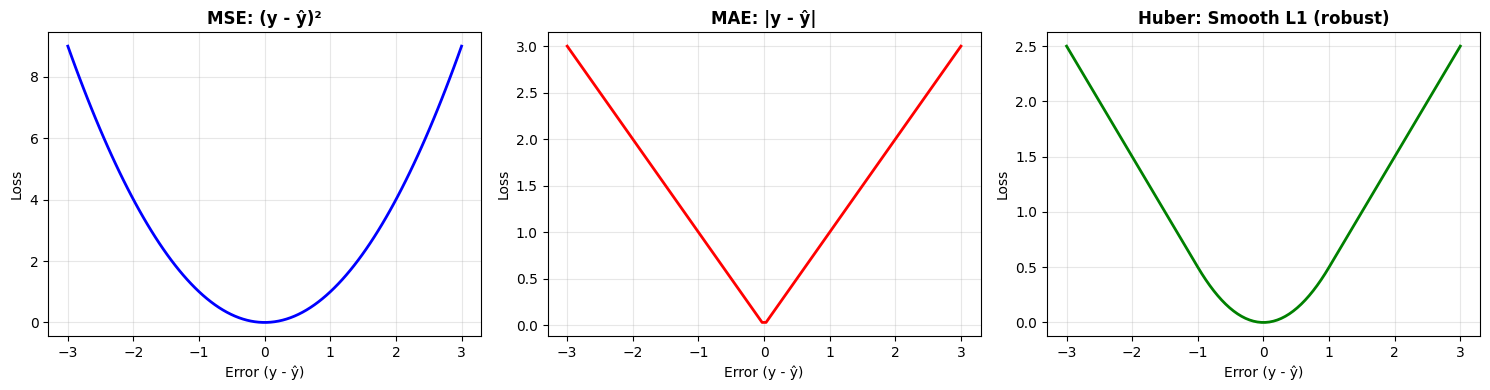


📊 WHEN TO USE EACH:
• MSE: Standard, penalizes large errors heavily
• MAE: Robust to outliers, harder to optimize
• Huber: Best of both - smooth near 0, linear for large errors


In [11]:
# Visualize loss functions
errors = np.linspace(-3, 3, 100)

mse_vals = errors**2
mae_vals = np.abs(errors)
huber_vals = np.where(np.abs(errors) < 1, 0.5*errors**2, np.abs(errors) - 0.5)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].plot(errors, mse_vals, 'b-', linewidth=2)
axes[0].set_title('MSE: (y - ŷ)²', fontweight='bold')
axes[0].set_xlabel('Error (y - ŷ)')
axes[0].set_ylabel('Loss')
axes[0].grid(True, alpha=0.3)

axes[1].plot(errors, mae_vals, 'r-', linewidth=2)
axes[1].set_title('MAE: |y - ŷ|', fontweight='bold')
axes[1].set_xlabel('Error (y - ŷ)')
axes[1].set_ylabel('Loss')
axes[1].grid(True, alpha=0.3)

axes[2].plot(errors, huber_vals, 'g-', linewidth=2)
axes[2].set_title('Huber: Smooth L1 (robust)', fontweight='bold')
axes[2].set_xlabel('Error (y - ŷ)')
axes[2].set_ylabel('Loss')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 WHEN TO USE EACH:")
print("• MSE: Standard, penalizes large errors heavily")
print("• MAE: Robust to outliers, harder to optimize")
print("• Huber: Best of both - smooth near 0, linear for large errors")

In [12]:
# Classification Losses
print("CLASSIFICATION LOSSES")
print("="*60)

# Binary Cross-Entropy
y_true_binary = torch.tensor([1., 0., 1., 1., 0.])
y_pred_probs = torch.tensor([0.9, 0.2, 0.8, 0.6, 0.3])  # Probabilities

bce_loss = nn.BCELoss()
bce = bce_loss(y_pred_probs, y_true_binary)

print("Binary Classification:")
print(f"True labels:  {y_true_binary.tolist()}")
print(f"Predictions:  {y_pred_probs.tolist()}")
print(f"BCE Loss:     {bce.item():.4f}")

# Multi-class Cross-Entropy
# Note: CrossEntropyLoss expects raw scores (logits), not probabilities!
y_true_multi = torch.tensor([0, 2, 1])  # Class indices
logits = torch.tensor([
    [2.0, 0.5, -1.0],   # Sample 1: High score for class 0 ✓
    [0.2, 0.1, 2.5],    # Sample 2: High score for class 2 ✓
    [-0.5, 1.5, 0.3]    # Sample 3: High score for class 1 ✓
])

ce_loss = nn.CrossEntropyLoss()
ce = ce_loss(logits, y_true_multi)

print(f"\nMulti-class Classification:")
print(f"True classes: {y_true_multi.tolist()}")
print(f"Logits:\n{logits}")
print(f"Probabilities (softmax):\n{F.softmax(logits, dim=1).round(decimals=3)}")
print(f"CE Loss:      {ce.item():.4f}")

CLASSIFICATION LOSSES
Binary Classification:
True labels:  [1.0, 0.0, 1.0, 1.0, 0.0]
Predictions:  [0.8999999761581421, 0.20000000298023224, 0.800000011920929, 0.6000000238418579, 0.30000001192092896]
BCE Loss:     0.2838

Multi-class Classification:
True classes: [0, 2, 1]
Logits:
tensor([[ 2.0000,  0.5000, -1.0000],
        [ 0.2000,  0.1000,  2.5000],
        [-0.5000,  1.5000,  0.3000]])
Probabilities (softmax):
tensor([[0.7860, 0.1750, 0.0390],
        [0.0840, 0.0760, 0.8400],
        [0.0940, 0.6960, 0.2100]])
CE Loss:      0.2594


### 📊 OUTPUT EXPLANATION:

**Binary Cross-Entropy (BCE):**
- Input: Probabilities (0-1)
- Measures: How wrong our probability estimates are
- Lower is better

**Cross-Entropy (CE):**
- Input: Raw logits (any real number)
- Internally applies softmax
- Measures: How wrong our class predictions are

---

## Part 3: Custom Loss Functions for Finance

In [18]:
# Custom Loss: Direction-Weighted MSE
# Penalize more when we predict wrong direction

class DirectionWeightedMSE(nn.Module):
    """
    MSE loss that penalizes wrong direction predictions more.
    
    If true is positive and pred is negative (or vice versa),
    the loss is multiplied by direction_penalty.
    """
    def __init__(self, direction_penalty=2.0):
        super().__init__()
        self.direction_penalty = direction_penalty
        
    def forward(self, pred, true):
        # Base MSE
        mse = (pred - true) ** 2
        
        # Check if direction is wrong
        wrong_direction = (pred * true) < 0  # Different signs
        
        # Apply penalty
        weights = torch.where(wrong_direction, 
                             torch.tensor(self.direction_penalty),
                             torch.tensor(1.0))
        
        return (weights * mse).mean()

# Test
true_returns = torch.tensor([0.01, -0.02, 0.015, -0.01, 0.005])
pred_returns = torch.tensor([0.008, -0.015, -0.005, 0.003, 0.003])  # Some wrong directions

mse = nn.MSELoss()(pred_returns, true_returns)
dir_mse = DirectionWeightedMSE(direction_penalty=3.0)(pred_returns, true_returns)

print("CUSTOM LOSS: Direction-Weighted MSE")
print("="*60)
print(f"True returns:  {true_returns.tolist()}")
print(f"Pred returns:  {pred_returns.tolist()}")

# Show direction matches
directions = ['✓' if (t*p) >= 0 else '✗' for t, p in zip(true_returns, pred_returns)]
print(f"Direction OK:  {directions}")
print()
print(f"Regular MSE:          {mse.item():.6f}")
print(f"Direction-Weighted:   {dir_mse.item():.6f}")
print("\n📊 Direction penalty = 3x for wrong direction predictions")

CUSTOM LOSS: Direction-Weighted MSE
True returns:  [0.009999999776482582, -0.019999999552965164, 0.014999999664723873, -0.009999999776482582, 0.004999999888241291]
Pred returns:  [0.00800000037997961, -0.014999999664723873, -0.004999999888241291, 0.003000000026077032, 0.003000000026077032]
Direction OK:  ['✓', '✓', '✗', '✗', '✓']

Regular MSE:          0.000120
Direction-Weighted:   0.000348

📊 Direction penalty = 3x for wrong direction predictions


In [19]:
# Sharpe Ratio Loss (for portfolio optimization)
class NegativeSharpe(nn.Module):
    """
    Negative Sharpe ratio as loss.
    
    Sharpe = mean(returns) / std(returns)
    We minimize negative Sharpe → maximize Sharpe
    """
    def __init__(self, annualization=np.sqrt(252)):
        super().__init__()
        self.annualization = annualization
        
    def forward(self, returns):
        mean_ret = returns.mean()
        std_ret = returns.std() + 1e-8  # Avoid division by zero
        sharpe = self.annualization * mean_ret / std_ret
        return -sharpe  # Negative because we minimize loss

# Test
daily_returns = torch.randn(252) * 0.01 + 0.0005  # Small positive drift
sharpe_loss = NegativeSharpe()(daily_returns)

print("SHARPE RATIO LOSS")
print("="*60)
print(f"Daily returns (sample): {daily_returns[:5].tolist()}")
print(f"Mean daily return:  {daily_returns.mean():.6f}")
print(f"Std daily return:   {daily_returns.std():.6f}")
print(f"Annualized Sharpe:  {-sharpe_loss.item():.2f}")
print(f"Loss (neg sharpe):  {sharpe_loss.item():.2f}")

SHARPE RATIO LOSS
Daily returns (sample): [0.007926281541585922, 0.0035811872221529484, 0.021016977727413177, -0.013578193262219429, -0.00030110793886706233]
Mean daily return:  0.000089
Std daily return:   0.009793
Annualized Sharpe:  0.14
Loss (neg sharpe):  -0.14


---

## Part 4: Putting It All Together

In [20]:
# Complete model with appropriate activation and loss
class ReturnPredictor(nn.Module):
    """
    Neural network for return prediction.
    
    Uses:
    - ReLU activations in hidden layers
    - No activation in output (regression)
    """
    def __init__(self, input_dim, hidden_dims=[64, 32]):
        super().__init__()
        
        layers = []
        prev_dim = input_dim
        
        for hidden_dim in hidden_dims:
            layers.extend([
                nn.Linear(prev_dim, hidden_dim),
                nn.ReLU(),
                nn.Dropout(0.2)
            ])
            prev_dim = hidden_dim
        
        # Output layer (no activation for regression)
        layers.append(nn.Linear(prev_dim, 1))
        
        self.network = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.network(x)

# Create model
model = ReturnPredictor(input_dim=10, hidden_dims=[64, 32])

print("RETURN PREDICTION MODEL")
print("="*60)
print(model)

# Show loss function options
print("\n📊 Loss Function Options:")
print("  • nn.MSELoss() - Standard regression")
print("  • nn.HuberLoss() - Robust to outliers")
print("  • DirectionWeightedMSE() - Penalize wrong directions")

RETURN PREDICTION MODEL
ReturnPredictor(
  (network): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)

📊 Loss Function Options:
  • nn.MSELoss() - Standard regression
  • nn.HuberLoss() - Robust to outliers
  • DirectionWeightedMSE() - Penalize wrong directions


In [21]:
# Compare losses with synthetic data
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic data with some outliers
n = 100
X = torch.randn(n, 10)
true_returns = 0.1 * X[:, 0] - 0.05 * X[:, 1] + torch.randn(n) * 0.01

# Add outliers
outlier_idx = torch.randint(0, n, (5,))
true_returns[outlier_idx] = torch.randn(5) * 0.1  # Large outliers

# Predictions from untrained model
model.eval()
with torch.no_grad():
    predictions = model(X).squeeze()

# Calculate different losses
mse = nn.MSELoss()(predictions, true_returns)
mae = nn.L1Loss()(predictions, true_returns)
huber = nn.HuberLoss()(predictions, true_returns)
dir_mse = DirectionWeightedMSE()(predictions, true_returns)

print("LOSS COMPARISON (Untrained Model)")
print("="*60)
print(f"MSE Loss:          {mse.item():.6f}")
print(f"MAE Loss:          {mae.item():.6f}")
print(f"Huber Loss:        {huber.item():.6f}")
print(f"Direction MSE:     {dir_mse.item():.6f}")

# Calculate direction accuracy
correct_dir = ((predictions > 0) == (true_returns > 0)).float().mean()
print(f"\nDirection Accuracy: {correct_dir.item():.2%}")
print("(Random guess would be ~50%)")

LOSS COMPARISON (Untrained Model)
MSE Loss:          0.020041
MAE Loss:          0.112714
Huber Loss:        0.010021
Direction MSE:     0.032924

Direction Accuracy: 59.00%
(Random guess would be ~50%)


---

## 📝 Day 2 Summary

### Activation Functions:
| Use Case | Activation |
|----------|------------|
| Hidden layers | ReLU (default), GELU (transformers) |
| Binary output | Sigmoid |
| Multi-class | Softmax |
| Regression | None (linear) |

### Loss Functions:
| Task | Loss |
|------|------|
| Regression | MSE, Huber |
| Binary | BCE |
| Multi-class | CrossEntropy |
| Finance | Direction-weighted, Sharpe |

### Key Takeaways:
1. ReLU avoids vanishing gradients
2. Huber is robust to outliers (common in finance)
3. Custom losses can encode domain knowledge

In [22]:
print("""
╔══════════════════════════════════════════════════════════════════╗
║         DAY 2 COMPLETE: ACTIVATION & LOSS FUNCTIONS              ║
╠══════════════════════════════════════════════════════════════════╣
║  ✓ Activation functions deep dive                               ║
║  ✓ Vanishing gradient problem                                   ║
║  ✓ Regression losses (MSE, MAE, Huber)                          ║
║  ✓ Classification losses (BCE, CE)                              ║
║  ✓ Custom financial losses                                      ║
╚══════════════════════════════════════════════════════════════════╝
""")


╔══════════════════════════════════════════════════════════════════╗
║         DAY 2 COMPLETE: ACTIVATION & LOSS FUNCTIONS              ║
╠══════════════════════════════════════════════════════════════════╣
║  ✓ Activation functions deep dive                               ║
║  ✓ Vanishing gradient problem                                   ║
║  ✓ Regression losses (MSE, MAE, Huber)                          ║
║  ✓ Classification losses (BCE, CE)                              ║
║  ✓ Custom financial losses                                      ║
╚══════════════════════════════════════════════════════════════════╝

